# A. Importation of libraries and Configs

In [1]:
# Standard libraries
import pandas as pd

In [2]:
class Config:
    # Path to the pseudonimized revenues dataset
    dataset_dir = r"Database\revenues_pseudonymized.xlsx"
    # Path to the enrollee infos
    enrollees_dir = r"Database\enrollees_pseudonymized.xlsx"
    # Path to the machine learning model parameters
    parameters_dir = r"MachineLearning\parameters.json"

    # Path to cache directory to store preprocessed dataset if needed
    cache_dir = ""
    load_cache = True

    # Path to store transformer results
    results_dir = r"C:\Users\rjbel\Python\Data\Thesis\Results"

    # Class to predict
    target_feature = 'dtp_bracket'
    # Test size in %
    test_size = 0.3


args = Config()

# B. Loading of datasets

## 1. Revenues

In [3]:
df_revenues = pd.read_excel(args.dataset_dir)

In [4]:
df_revenues

,entry_number,entry_date,due_date,school_year,student_id_pseudonimized,category_name,discount_refund_applied_to,amount_due,amount_paid,account_name,receivables
0,0,2025-10-13,2025-10-13,2014,9XBPS6GQ,Form 137,NaN,150.0,150.0,G-Cash,0.0
1,1,2016-01-01,2016-01-01,2016,QCNXOF71,Back Account,NaN,3524.0,0.0,Not Applicable,3524.0
2,2,2016-01-01,2016-01-01,2016,UFN5RBCA,Back Account,NaN,9831.0,0.0,Not Applicable,9831.0
3,3,2016-01-01,2016-01-01,2016,CATF26JR,Back Account,NaN,9240.0,0.0,Not Applicable,9240.0
4,4,2016-01-01,2016-01-01,2016,TE11Z2LJ,Back Account,NaN,5886.0,0.0,Not Applicable,5886.0
...,...,...,...,...,...,...,...,...,...,...,...
51498,53704,2026-02-18,2026-12-04,2026,B5DSEMMK,Kn1-C-3rd,NaN,5200.0,0.0,Not Applicable,5200.0
51499,53705,2026-02-18,2027-02-05,2026,B5DSEMMK,Kn1-C-4th,NaN,5200.0,0.0,Not Applicable,5200.0
51500,53706,2026-02-18,2026-08-07,2026,B5DSEMMK,Kn1-OF-1st,NaN,4267.0,4267.0,G-Cash,0.0
51501,53707,2026-02-18,2026-12-04,2026,B5DSEMMK,Kn1-OF-2nd,NaN,4267.0,0.0,Not Applicable,4267.0


## 2. Enrollees

In [5]:
df_enrollees = pd.read_excel(args.enrollees_dir)

## 3. Credit Sales

In [6]:
from FeatureEngineering.credit_sales_machine_learning import CreditSales

cs = CreditSales(df_revenues, df_enrollees)
df_credit_sales = cs.show_data()

Single due date records: 10063
Multiple due date records: 254


c:\Users\rjbel\Python\Notebooks\Mapua\Thesis\FeatureEngineering\credit_sales_machine_learning.py:559: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return trend.fillna(0)
c:\Users\rjbel\Python\Notebooks\Mapua\Thesis\FeatureEngineering\credit_sales_machine_learning.py:559: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return trend.fillna(0)


In [7]:
df_credit_sales

,school_year,student_id_pseudonimized,category_name,gross_receivables,amount_discounted,adjustments,credit_sale_amount,due_date,date_fully_paid,last_payment_date,...,amount_due_cumsum,amount_paid_cumsum,opening_balance,plan_type_Plan - A,plan_type_Plan - B,plan_type_Plan - C,plan_type_Plan - D,plan_type_Plan - E,plan_type_nan,dtp_bracket
0,2022,02PNVPI5,Kn2-C-1st,2800.0,0.0,0.0,2800.0,2022-09-09,2022-09-06,2022-08-04,...,29227.0,30227.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,on_time
1,2022,02PNVPI5,Kn2-C-2nd,2800.0,0.0,0.0,2800.0,2022-11-05,NaT,2022-09-06,...,32027.0,30227.0,1800.0,0.0,0.0,1.0,0.0,0.0,0.0,None
2,2022,02PNVPI5,Kn2-OF-2nd,2267.0,0.0,0.0,2267.0,2022-12-05,NaT,2022-09-06,...,34294.0,30227.0,4067.0,0.0,0.0,1.0,0.0,0.0,0.0,None
3,2022,02PNVPI5,Kn2 - Moving Up - Male,2600.0,0.0,0.0,2600.0,2022-12-16,NaT,2022-12-12,...,38520.0,31027.0,7493.0,0.0,0.0,1.0,0.0,0.0,0.0,None
4,2022,02PNVPI5,Events - Foundation Day,490.0,0.0,0.0,490.0,2022-12-16,NaT,2022-12-12,...,38520.0,31027.0,7493.0,0.0,0.0,1.0,0.0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10312,2025,ZXPL0CI9,G06-OF-2nd,5800.0,0.0,0.0,5800.0,2025-12-05,2026-01-08,2025-10-27,...,203170.0,191570.0,11600.0,0.0,0.0,1.0,0.0,0.0,0.0,60_days
10313,2025,ZXPL0CI9,G06-C-3rd,5800.0,0.0,0.0,5800.0,2025-12-05,2026-01-08,2025-10-27,...,203170.0,191570.0,11600.0,0.0,0.0,1.0,0.0,0.0,0.0,60_days
10314,2025,ZXPL0CI9,G06-C-4th,5800.0,0.0,0.0,5800.0,2026-02-06,2026-02-09,2026-01-08,...,208970.0,203170.0,5800.0,0.0,0.0,1.0,0.0,0.0,0.0,30_days
10315,2025,ZXPL0CI9,Graduation - Other Services,1500.0,0.0,0.0,1500.0,2026-02-18,NaT,2026-02-09,...,210470.0,208970.0,1500.0,0.0,0.0,1.0,0.0,0.0,0.0,None


In [8]:
df_credit_sales.columns

Index(['school_year', 'student_id_pseudonimized', 'category_name',
       'gross_receivables', 'amount_discounted', 'adjustments',
       'credit_sale_amount', 'due_date', 'date_fully_paid',
       'last_payment_date', 'days_elapsed_until_fully_paid', 'dtp_1', 'dtp_2',
       'dtp_3', 'dtp_4', 'dtp_avg', 'dtp_wavg', 'due_date_prev_1',
       'due_date_prev_2', 'dtp_2_trend', 'dtp_3_trend',
       'days_since_last_payment', 'amount_due_cumsum', 'amount_paid_cumsum',
       'opening_balance', 'plan_type_Plan - A', 'plan_type_Plan - B',
       'plan_type_Plan - C', 'plan_type_Plan - D', 'plan_type_Plan - E',
       'plan_type_nan', 'dtp_bracket'],
      dtype='object')

In [9]:
# Get counts
counts = df_credit_sales.dtp_bracket.value_counts()

# Convert to percentages
percentages = counts / counts.sum() * 100

# Combine into one DataFrame
result = pd.DataFrame({
    'count': counts,
    'percentage': percentages.round(2)  # round to 2 decimal places
})

print(result)

             count  percentage
dtp_bracket                   
on_time       3734       40.03
30_days       2743       29.40
90_days       1804       19.34
60_days       1048       11.23


In [10]:
df_credit_sales.dropna(subset=['dtp_1', 'dtp_2', 'dtp_3', 'dtp_4', 'dtp_bracket'], inplace=True)

# Drop plans D, E, and not enrolled
df_credit_sales = df_credit_sales[
    (df_credit_sales['plan_type_Plan - D'] != 1) &
    (df_credit_sales['plan_type_Plan - E'] != 1) &
    (df_credit_sales['plan_type_nan'] != 1)
]

In [11]:
df_credit_sales

,school_year,student_id_pseudonimized,category_name,gross_receivables,amount_discounted,adjustments,credit_sale_amount,due_date,date_fully_paid,last_payment_date,...,amount_due_cumsum,amount_paid_cumsum,opening_balance,plan_type_Plan - A,plan_type_Plan - B,plan_type_Plan - C,plan_type_Plan - D,plan_type_Plan - E,plan_type_nan,dtp_bracket
15,2021,07EGT7GO,Kn2-C-3rd,2800.0,0.0,0.0,2800.0,2022-02-07,2022-01-29,2022-01-03,...,30960.0,30960.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,on_time
16,2021,07EGT7GO,Kn2-C-4th,2800.0,0.0,0.0,2800.0,2022-04-04,2022-03-31,2022-01-29,...,33760.0,33760.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,on_time
21,2025,07HFC4W3,Kn2-C-4th,5400.0,-700.0,0.0,4700.0,2026-02-06,2026-01-29,2025-12-05,...,61737.0,61037.0,700.0,0.0,0.0,1.0,0.0,0.0,0.0,on_time
29,2019,08GNGU9D,G04-OF-2nd,2900.0,0.0,0.0,2900.0,2019-12-06,2019-12-14,2019-10-29,...,60882.0,55117.0,5765.0,0.0,1.0,0.0,0.0,0.0,0.0,30_days
34,2022,09ISZU99,G02-OF-Full,7000.0,-1032.0,0.0,5968.0,2022-07-16,2022-10-07,2022-07-14,...,92285.0,85285.0,7000.0,1.0,0.0,0.0,0.0,0.0,0.0,90_days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10310,2025,ZXPL0CI9,Extra Curricular - Others,1700.0,0.0,0.0,1700.0,2025-08-28,2025-09-09,2025-08-05,...,185520.0,183820.0,1700.0,0.0,0.0,1.0,0.0,0.0,0.0,30_days
10311,2025,ZXPL0CI9,G06-C-2nd,5800.0,0.0,0.0,5800.0,2025-10-03,2025-10-27,2025-09-09,...,191320.0,185520.0,5800.0,0.0,0.0,1.0,0.0,0.0,0.0,30_days
10312,2025,ZXPL0CI9,G06-OF-2nd,5800.0,0.0,0.0,5800.0,2025-12-05,2026-01-08,2025-10-27,...,203170.0,191570.0,11600.0,0.0,0.0,1.0,0.0,0.0,0.0,60_days
10313,2025,ZXPL0CI9,G06-C-3rd,5800.0,0.0,0.0,5800.0,2025-12-05,2026-01-08,2025-10-27,...,203170.0,191570.0,11600.0,0.0,0.0,1.0,0.0,0.0,0.0,60_days


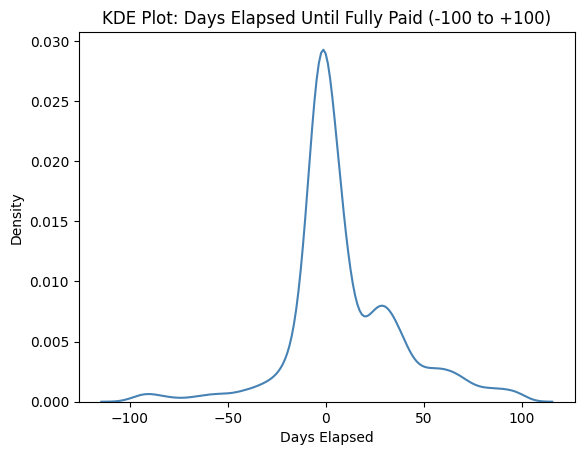

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clean the column: drop NaNs and empty strings
cleaned_days = df_credit_sales['days_elapsed_until_fully_paid']
cleaned_days = cleaned_days.replace("", np.nan).dropna()

# Filter to range -300 to +300
filtered_days = cleaned_days[(cleaned_days >= -100) & (cleaned_days <= 100)]

# KDE plot
sns.kdeplot(
    x=filtered_days,
    fill=False,
    color="steelblue"
)

plt.title("KDE Plot: Days Elapsed Until Fully Paid (-100 to +100)")
plt.xlabel("Days Elapsed")
plt.ylabel("Density")
plt.show()

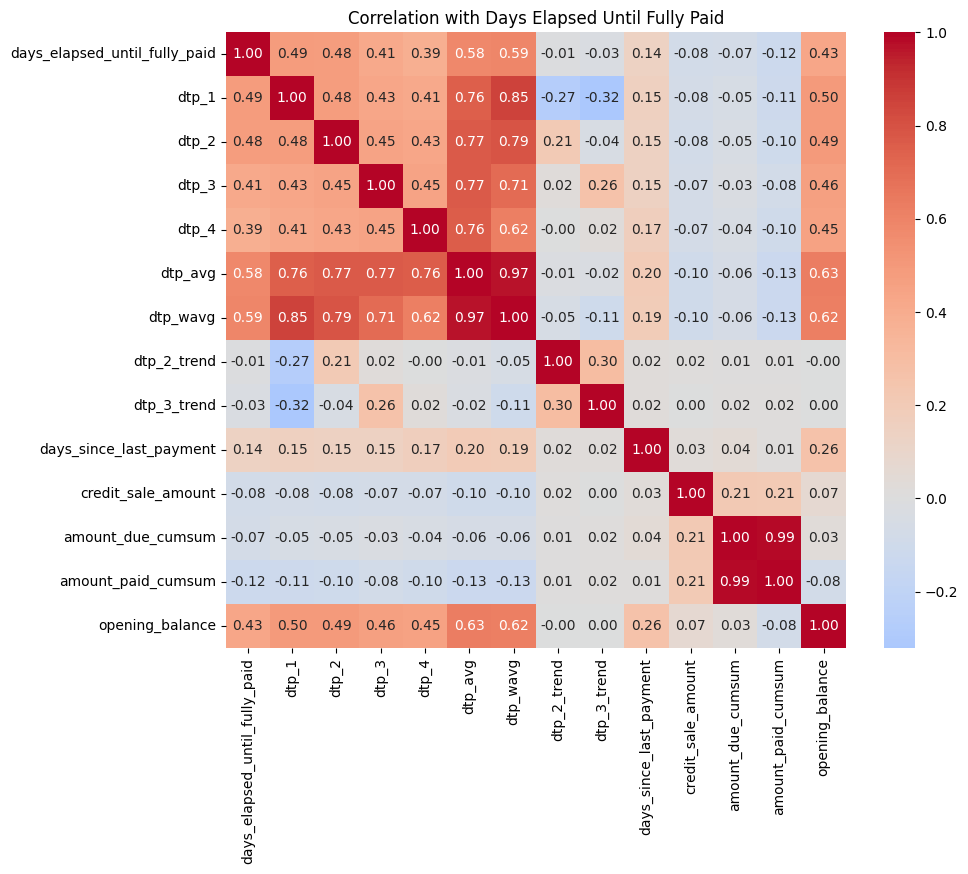

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

df_credit_sales = df_credit_sales.dropna(subset=['dtp_1', 'dtp_2', 'dtp_3', 'dtp_4'])

# Select relevant columns
cols = ['days_elapsed_until_fully_paid', 
        'dtp_1', 'dtp_2', 'dtp_3', 'dtp_4', 
        'dtp_avg', 'dtp_wavg', 'dtp_2_trend',
        'dtp_3_trend', 'days_since_last_payment',
        'credit_sale_amount', 'amount_due_cumsum',
        'amount_paid_cumsum', 'opening_balance']

# Compute correlation matrix
corr = df_credit_sales[cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation with Days Elapsed Until Fully Paid")
plt.show()

# C. Machine Learning Pipelines

In [14]:
drop_columns = ['school_year', 'student_id_pseudonimized', 'category_name',
       'gross_receivables', 'amount_discounted', 'adjustments', 'due_date_prev_1',
       'due_date_prev_2', 'date_fully_paid', 'last_payment_date',
       'days_elapsed_until_fully_paid', 'plan_type_Plan - D',
       'plan_type_Plan - E', 'plan_type_nan']

drop_columns = drop_columns + ['credit_sale_amount', 'days_since_last_payment', 'amount_due_cumsum', 'amount_paid_cumsum']
drop_columns = drop_columns + ['plan_type_Plan - A', 'plan_type_Plan - B', 'plan_type_Plan - C']

df_data = df_credit_sales.drop(columns=drop_columns)

In [15]:
df_data.columns

Index(['due_date', 'dtp_1', 'dtp_2', 'dtp_3', 'dtp_4', 'dtp_avg', 'dtp_wavg',
       'dtp_2_trend', 'dtp_3_trend', 'opening_balance', 'dtp_bracket'],
      dtype='object')

In [16]:
from MachineLearning.Utils.data_preparation import DataPreparer

# Initialize the preparer
preparer = DataPreparer(df_data, args.target_feature, test_size=args.test_size)

# Run preprocessing
preparer.prep_data()

# Load the train/test splits
X_train = preparer.X_train
X_test  = preparer.X_test
y_train = preparer.y_train
y_test  = preparer.y_test

c:\Users\rjbel\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Partitioning the datasets based on due_date...
Applying manual oversampling...


In [ ]:
from MachineLearning import (
    AdaBoostPipeline,
    DecisionTreePipeline,
    GaussianNaiveBayesPipeline,
    KnearestNeighborPipeline,
    RandomForestPipeline,
    XGboostPipeline,
    MultiLayerPerceptronPipeline,
    TransformerPipeline,
)

models = {
    "ada_boost": AdaBoostPipeline,
    "decision_tree": DecisionTreePipeline,
    "gaussian_naive_bayes": GaussianNaiveBayesPipeline,
    "knn": KnearestNeighborPipeline,
    "random_forest": RandomForestPipeline,
    "xgboost": XGboostPipeline,
    "nn_mlp": MultiLayerPerceptronPipeline,
    #"nn_rnn": RecurrentNeuralNetworkPipeline,
    #"nn_transformer": TransformerPipeline
}

In [18]:
# To silence the error when running knn:
# UserWarning: Could not find the number of physical cores for the following reason:
# [WinError 2]
import os

os.environ['OMP_NUM_THREADS'] = '16'

In [19]:
import pandas as pd
from MachineLearning.Utils.load_parameters import ParameterLoader

# Load parameters from JSON
loader = ParameterLoader(args.parameters_dir)

all_results = []  # list to gather results

for model_name, pipeline_class in models.items():
    param_list = loader.get_parameters(model_name)

    for param in param_list:
        print(f"Running {model_name} with parameters: {param}")

        pipeline = pipeline_class(X_train, X_test, y_train, y_test,
                                  args,
                                  param)

        # Capture results from pipeline
        result = pipeline.build_model().train().evaluation().show_results()

        # Add metadata (model name + parameters)
        result["model"] = model_name
        result["parameters"] = str(param)

        all_results.append(result)

# Convert to DataFrame
results_df = pd.DataFrame(all_results)

# Export to Excel
results_df.to_excel("MachineLearning/Results/model_results.xlsx", index=False)
print("All results saved to model_results.xlsx")

Running ada_boost with parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Running ada_boost with parameters: {'learning_rate': 0.01, 'n_estimators': 150}
Running ada_boost with parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Running ada_boost with parameters: {'learning_rate': 0.1, 'n_estimators': 150}
Running ada_boost with parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Running ada_boost with parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Running ada_boost with parameters: {'learning_rate': 1.0, 'n_estimators': 150}
Running decision_tree with parameters: {'max_depth': 10, 'min_samples_leaf': 1}
Running decision_tree with parameters: {'max_depth': 10, 'min_samples_leaf': 3}
Running decision_tree with parameters: {'max_depth': 10, 'min_samples_leaf': 5}
Running decision_tree with parameters: {'max_depth': 20, 'min_samples_leaf': 1}
Running decision_tree with parameters: {'max_depth': 20, 'min_samples_leaf': 3}
Running decision_tree with parameters: {'max_dept

Loading weights: 100%|██████████| 100/100 [00:00<00:00, 927.01it/s, Materializing param=distilbert.transformer.layer.5.sa_layer_norm.weight]   
DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_layer_norm.weight | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
vocab_transform.weight  | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
pre_classifier.weight   | MISSING    | 
classifier.bias         | MISSING    | 
pre_classifier.bias     | MISSING    | 
classifier.weight       | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


[INFO] Using device: cuda


`logging_dir` is deprecated and will be removed in v5.2. Please set `TENSORBOARD_LOGGING_DIR` instead.


Epoch,Training Loss,Validation Loss
1,No log,1.069416
2,No log,1.219455
3,1.245210,1.238218
4,1.245210,1.225280
5,1.245210,1.250426
6,1.149442,1.258609
7,1.149442,1.292859
8,1.149442,1.298468
9,1.100333,1.332636
10,1.100333,1.315298


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]
There were missing keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.weight', 'distilbert.embeddings.LayerNorm.bias'].
There were unexpected keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.beta', 'distilbert.embeddings.LayerNorm.gamma'].


[INFO] Deleted checkpoint directory after loading best model.


Running nn_transformer with parameters: {'num_layers': 6, 'num_heads': 8, 'd_model': 512, 'epochs': 40}
[INFO] Auto-detected 4 classes: [0, 1, 2, 3]


Loading weights: 100%|██████████| 100/100 [00:00<00:00, 1076.48it/s, Materializing param=distilbert.transformer.layer.5.sa_layer_norm.weight]   
DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_layer_norm.weight | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
vocab_transform.weight  | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
pre_classifier.weight   | MISSING    | 
classifier.bias         | MISSING    | 
pre_classifier.bias     | MISSING    | 
classifier.weight       | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


[INFO] Using device: cuda


`logging_dir` is deprecated and will be removed in v5.2. Please set `TENSORBOARD_LOGGING_DIR` instead.


Epoch,Training Loss,Validation Loss
1,No log,1.052854
2,No log,1.210956
3,1.261353,1.220299
4,1.261353,1.239269
5,1.261353,1.254917
6,1.160813,1.247149
7,1.160813,1.276605
8,1.160813,1.295662
9,1.097724,1.333587
10,1.097724,1.321966


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
There were missing keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.weight', 'distilbert.embeddings.LayerNorm.bias'].
There were unexpected keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.beta', 'distilbert.embeddings.LayerNorm.gamma'].


[INFO] Deleted checkpoint directory after loading best model.


Running nn_transformer with parameters: {'num_layers': 2, 'num_heads': 4, 'd_model': 128, 'epochs': 30}
[INFO] Auto-detected 4 classes: [0, 1, 2, 3]


Loading weights: 100%|██████████| 100/100 [00:00<00:00, 851.09it/s, Materializing param=distilbert.transformer.layer.5.sa_layer_norm.weight]   
DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_layer_norm.weight | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
vocab_transform.weight  | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
pre_classifier.weight   | MISSING    | 
classifier.bias         | MISSING    | 
pre_classifier.bias     | MISSING    | 
classifier.weight       | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


[INFO] Using device: cuda


`logging_dir` is deprecated and will be removed in v5.2. Please set `TENSORBOARD_LOGGING_DIR` instead.


Epoch,Training Loss,Validation Loss
1,No log,1.104433
2,No log,1.177242
3,1.251525,1.227050
4,1.251525,1.250949
5,1.251525,1.259674
6,1.141217,1.278698
7,1.141217,1.303949
8,1.141217,1.315907
9,1.088613,1.338041
10,1.088613,1.327806


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]
There were missing keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.weight', 'distilbert.embeddings.LayerNorm.bias'].
There were unexpected keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.beta', 'distilbert.embeddings.LayerNorm.gamma'].


[INFO] Deleted checkpoint directory after loading best model.


All results saved to model_results.xlsx


In [20]:
results_df.sort_values(by='accuracy', ascending=False)

,accuracy,precision_macro,recall_macro,f1_macro,model,parameters,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
2,0.759681,0.618651,0.584212,0.593172,ada_boost,"{'learning_rate': 0.1, 'n_estimators': 50}",NaN,NaN,NaN,NaN,NaN
0,0.756264,0.371506,0.451246,0.399477,ada_boost,"{'learning_rate': 0.01, 'n_estimators': 50}",NaN,NaN,NaN,NaN,NaN
14,0.752847,0.607425,0.557933,0.574687,gaussian_naive_bayes,{'var_smoothing': 0.001},NaN,NaN,NaN,NaN,NaN
1,0.751708,0.417539,0.466928,0.436521,ada_boost,"{'learning_rate': 0.01, 'n_estimators': 150}",NaN,NaN,NaN,NaN,NaN
5,0.750000,0.590174,0.600471,0.592750,ada_boost,"{'learning_rate': 1.0, 'n_estimators': 50}",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12,0.610478,0.471905,0.496994,0.466699,decision_tree,"{'max_depth': 20, 'min_samples_leaf': 5}",NaN,NaN,NaN,NaN,NaN
10,0.606492,0.449763,0.474257,0.448586,decision_tree,"{'max_depth': 20, 'min_samples_leaf': 1}",NaN,NaN,NaN,NaN,NaN
61,0.563781,0.331394,0.412110,0.359392,nn_transformer,"{'num_layers': 6, 'num_heads': 8, 'd_model': 5...",1.052878,2.8467,616.847,38.641,17.0
60,0.554670,0.467453,0.448790,0.399975,nn_transformer,"{'num_layers': 4, 'num_heads': 8, 'd_model': 2...",1.069174,2.4002,731.610,45.830,17.0


In [21]:
results_df.sort_values(by='precision_macro', ascending=False)

,accuracy,precision_macro,recall_macro,f1_macro,model,parameters,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
2,0.759681,0.618651,0.584212,0.593172,ada_boost,"{'learning_rate': 0.1, 'n_estimators': 50}",NaN,NaN,NaN,NaN,NaN
14,0.752847,0.607425,0.557933,0.574687,gaussian_naive_bayes,{'var_smoothing': 0.001},NaN,NaN,NaN,NaN,NaN
59,0.741458,0.606632,0.588390,0.587423,nn_mlp,"{'hidden_layer_sizes': [100], 'activation': 'r...",NaN,NaN,NaN,NaN,NaN
5,0.750000,0.590174,0.600471,0.592750,ada_boost,"{'learning_rate': 1.0, 'n_estimators': 50}",NaN,NaN,NaN,NaN,NaN
4,0.743166,0.586785,0.599829,0.586659,ada_boost,"{'learning_rate': 0.5, 'n_estimators': 50}",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1,0.751708,0.417539,0.466928,0.436521,ada_boost,"{'learning_rate': 0.01, 'n_estimators': 150}",NaN,NaN,NaN,NaN,NaN
57,0.730068,0.373091,0.439642,0.394062,nn_mlp,"{'hidden_layer_sizes': [64, 32], 'activation':...",NaN,NaN,NaN,NaN,NaN
58,0.716970,0.371734,0.430979,0.390043,nn_mlp,"{'hidden_layer_sizes': [128, 64], 'activation'...",NaN,NaN,NaN,NaN,NaN
0,0.756264,0.371506,0.451246,0.399477,ada_boost,"{'learning_rate': 0.01, 'n_estimators': 50}",NaN,NaN,NaN,NaN,NaN


In [22]:
results_df.sort_values(by='f1_macro', ascending=False)

,accuracy,precision_macro,recall_macro,f1_macro,model,parameters,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
2,0.759681,0.618651,0.584212,0.593172,ada_boost,"{'learning_rate': 0.1, 'n_estimators': 50}",NaN,NaN,NaN,NaN,NaN
5,0.750000,0.590174,0.600471,0.592750,ada_boost,"{'learning_rate': 1.0, 'n_estimators': 50}",NaN,NaN,NaN,NaN,NaN
59,0.741458,0.606632,0.588390,0.587423,nn_mlp,"{'hidden_layer_sizes': [100], 'activation': 'r...",NaN,NaN,NaN,NaN,NaN
4,0.743166,0.586785,0.599829,0.586659,ada_boost,"{'learning_rate': 0.5, 'n_estimators': 50}",NaN,NaN,NaN,NaN,NaN
6,0.747153,0.580075,0.588436,0.582793,ada_boost,"{'learning_rate': 1.0, 'n_estimators': 150}",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
60,0.554670,0.467453,0.448790,0.399975,nn_transformer,"{'num_layers': 4, 'num_heads': 8, 'd_model': 2...",1.069174,2.4002,731.610,45.830,17.0
0,0.756264,0.371506,0.451246,0.399477,ada_boost,"{'learning_rate': 0.01, 'n_estimators': 50}",NaN,NaN,NaN,NaN,NaN
57,0.730068,0.373091,0.439642,0.394062,nn_mlp,"{'hidden_layer_sizes': [64, 32], 'activation':...",NaN,NaN,NaN,NaN,NaN
58,0.716970,0.371734,0.430979,0.390043,nn_mlp,"{'hidden_layer_sizes': [128, 64], 'activation'...",NaN,NaN,NaN,NaN,NaN
